In [26]:
library(gplots)
library(ggplot2)
library(reshape2)
#library(umap)
filtered <- read.table("../7614_final_summary_anno3.txt",header=T,sep="\t")
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]
variant_list<-unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list)

variant_list$sample_number_presented <- NA

for (i in 1:nrow(variant_list)){
    filtered2 <- filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]
    n_row <- nrow(filtered2[filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$LOWER_CI>0.001677998 & 
          filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$UPPER_CI<0.3923302,])
    variant_list$sample_number_presented[i] <- n_row
    }

# 7614 CTX Cell type geoclone

In [3]:
melt_mtcars<-mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Hemisphere')]
#melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])

#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('COUPTF2','DLX1','TBR1'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('BG','CTX','HIP','THAL'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'),]

melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [4]:
casted_MAF_VarBySample <- dcast(melt_mtcars, CHROM.POS.REF.ALT~ID, value.var = "MAF" , na.rm=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$CHROM.POS.REF.ALT
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[ , !(names(casted_MAF_VarBySample) %in% c("CHROM.POS.REF.ALT"))]

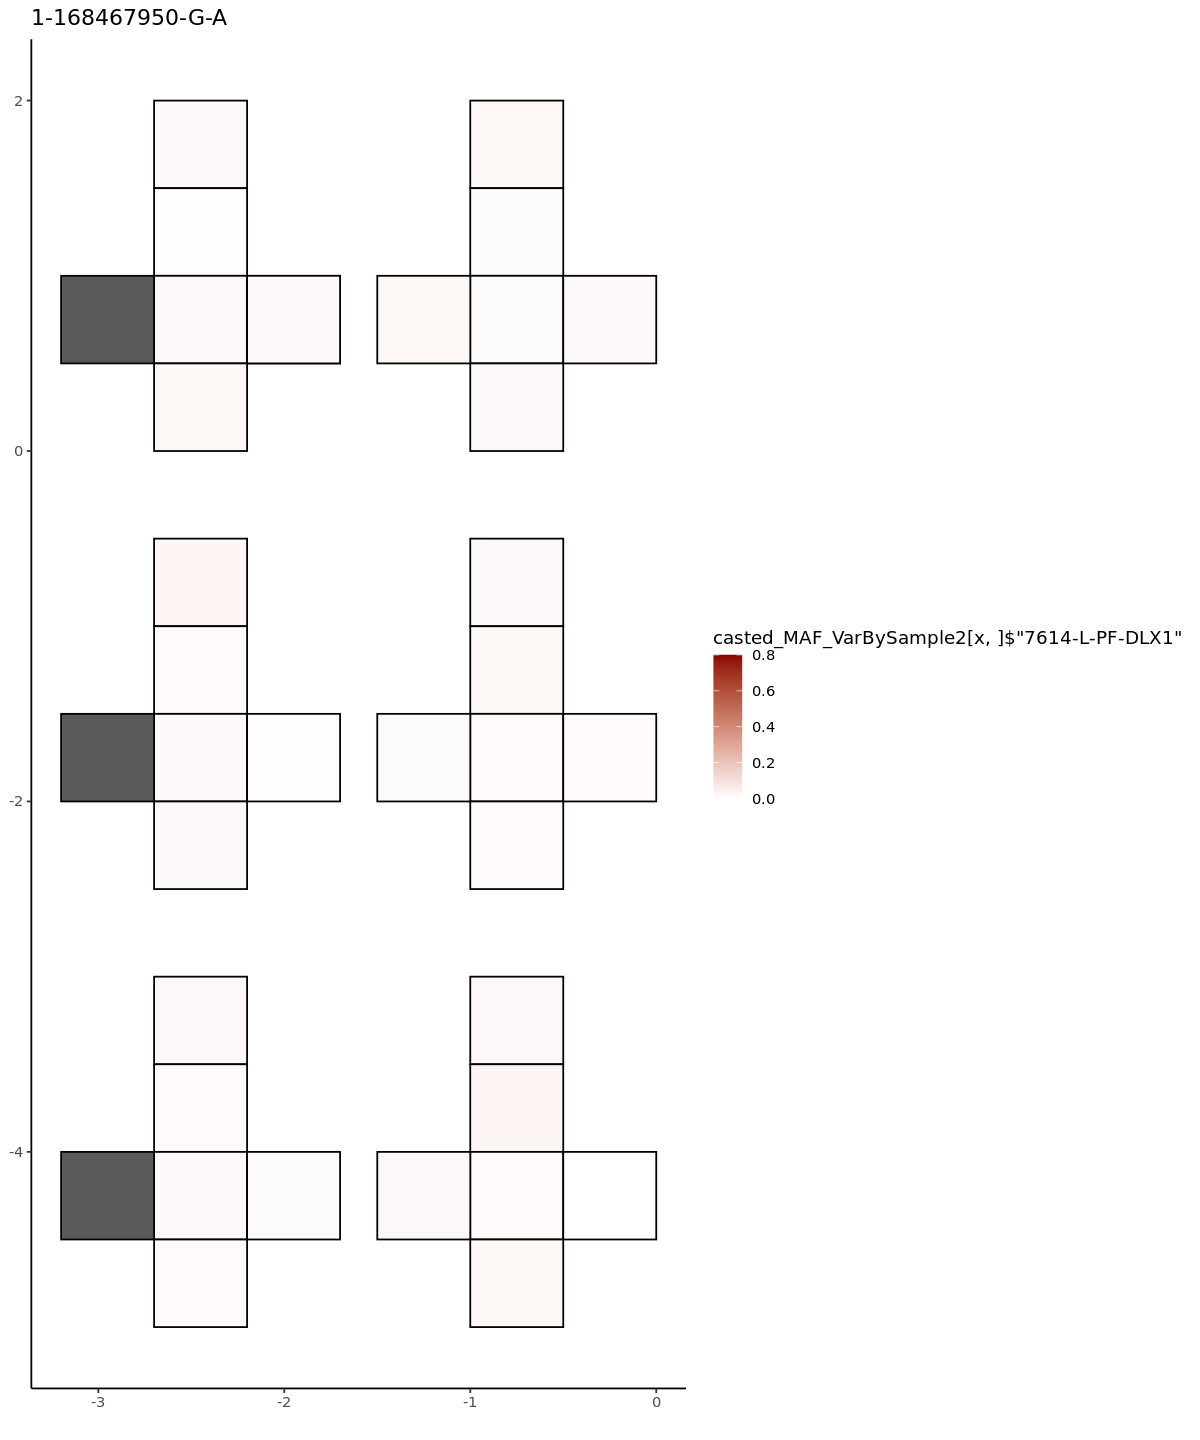

In [23]:
options(repr.plot.width=10, repr.plot.height=12)

a<-0
b<-0
c<-0
d<--2.5
e<- 0
f <- 2.5
x <- 2
# pdf(file="Interneuron_7614_geoclone.pdf",width=16,height=6)
# for(x in 1:192){
plot <- ggplot() + 

geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-1, ymax = d-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-PF-DLX1'),color='black')+ # 7614-L-Sml-PF
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-1.5, ymax = d-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-F-34-DLX1'),color='black')+ # 7614-L-Sml-F
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-9-Ins-DLX1'),color='black')+ # 7614-L-9-Sml-Ins
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-2.5, ymax = d-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-O-DLX1'),color='black')+ # 7614-L-Sml-O
geom_rect(aes(xmin = a-2.2, xmax = a-1.7, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-T-DLX1'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = a-3.2, xmax = a-2.7, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # 7614-L-Sml-P

geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-1, ymax = d-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-PF-DLX1'),color='black')+ # 7614-R-Sml-PF
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-1.5, ymax = d-1, fill=casted_MAF_VarBySample2[x,]$'7614-R-F-DLX1'),color='black')+ # 7614-R-Sml-F
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-5-Ins-DLX1'),color='black')+ # 7614-R-5-Sml-Ins
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-2.5, ymax = d-2, fill=casted_MAF_VarBySample2[x,]$'7614-R-O-DLX1'),color='black')+ # 7614-R-Sml-O
geom_rect(aes(xmin = a-1.5, xmax = a-1, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-T-DLX1'),color='black')+ # 7614-R-Sml-T
geom_rect(aes(xmin = a-0.5, xmax = a, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-P-DLX1'),color='black')+ # 7614-R-Sml-P
    
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-1, ymax = e-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-PF-TBR1'),color='black')+ # 7614-L-Sml-PF
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-1.5, ymax = e-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-F-34-TBR1'),color='black')+ # 7614-L-Sml-F
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-9-Ins-TBR1'),color='black')+ # 7614-L-9-Sml-Ins
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-2.5, ymax = e-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-O-TBR1'),color='black')+ # 7614-L-Sml-O
geom_rect(aes(xmin = b-2.2, xmax = b-1.7, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-T-TBR1'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = b-3.2, xmax = b-2.7, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # 7614-L-Sml-P

geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-1, ymax = e-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-PF-TBR1'),color='black')+ # 7614-R-Sml-PF
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-1.5, ymax = e-1, fill=casted_MAF_VarBySample2[x,]$'7614-R-F-TBR1'),color='black')+ # 7614-R-Sml-F
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-5-Ins-TBR1'),color='black')+ # 7614-R-5-Sml-Ins
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-2.5, ymax = e-2, fill=casted_MAF_VarBySample2[x,]$'7614-R-O-TBR1'),color='black')+ # 7614-R-Sml-O
geom_rect(aes(xmin = b-1.5, xmax = b-1, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-T-TBR1'),color='black')+ # 7614-R-Sml-T
geom_rect(aes(xmin = b-0.5, xmax = b, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-P-TBR1'),color='black')+ # 7614-R-Sml-P
    
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-1, ymax = f-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-PF-COUPTF2'),color='black')+ # 7614-L-Sml-PF
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-1.5, ymax = f-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-F-COUPTF2'),color='black')+ # 7614-L-Sml-F
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-9-Ins-COUPTF2'),color='black')+ # 7614-L-9-Sml-Ins
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-2.5, ymax = f-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-O-COUPTF2'),color='black')+ # 7614-L-Sml-O
geom_rect(aes(xmin = c-2.2, xmax = c-1.7, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-T-COUPTF2'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = c-2.2, xmax = c-1.7, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-P-COUPTF2'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = c-3.2, xmax = c-2.7, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # 7614-L-Sml-P

geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-1, ymax = f-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-PF-COUPTF2'),color='black')+ # 7614-R-Sml-PF
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-1.5, ymax = f-1, fill=casted_MAF_VarBySample2[x,]$'7614-R-F-COUPTF2'),color='black')+ # 7614-R-Sml-F
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-5-Ins-COUPTF2'),color='black')+ # 7614-R-5-Sml-Ins
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-2.5, ymax = f-2, fill=casted_MAF_VarBySample2[x,]$'7614-R-O-COUPTF2'),color='black')+ # 7614-R-Sml-O
geom_rect(aes(xmin = c-1.5, xmax = c-1, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-T-COUPTF2'),color='black')+ # 7614-R-Sml-T
geom_rect(aes(xmin = c-0.5, xmax = c, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-P-COUPTF2'),color='black')+ # 7614-R-Sml-P
labs(title=rownames(casted_MAF_VarBySample2)[x],x="")+
#scale_fill_continuous(limits = c(0, 0.5))
scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_classic()
plot

In [31]:
options(repr.plot.width=10, repr.plot.height=12)

a<-0
b<-0
c<-0
d<--2.5 # DLX1
e<- 0 # TBR1
f <- 2.5 # COUPTF2
x <- 2
pdf(file="Interneuron_7614_CTX_Cell_Type_geoclone.pdf",width=10,height=12)
for(x in 1:nrow(casted_MAF_VarBySample2)){
plot<-ggplot() + 

geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-1, ymax = d-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-PF-DLX1'),color='black')+ # 7614-L-Sml-PF
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-1.5, ymax = d-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-F-34-DLX1'),color='black')+ # 7614-L-Sml-F
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-9-Ins-DLX1'),color='black')+ # 7614-L-9-Sml-Ins
geom_rect(aes(xmin = a-2.7, xmax = a-2.2, ymin = d-2.5, ymax = d-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-O-DLX1'),color='black')+ # 7614-L-Sml-O
geom_rect(aes(xmin = a-2.2, xmax = a-1.7, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-T-DLX1'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = a-3.2, xmax = a-2.7, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # 7614-L-Sml-P

geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-1, ymax = d-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-PF-DLX1'),color='black')+ # 7614-R-Sml-PF
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-1.5, ymax = d-1, fill=casted_MAF_VarBySample2[x,]$'7614-R-F-DLX1'),color='black')+ # 7614-R-Sml-F
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-5-Ins-DLX1'),color='black')+ # 7614-R-5-Sml-Ins
geom_rect(aes(xmin = a-1, xmax = a-0.5, ymin = d-2.5, ymax = d-2, fill=casted_MAF_VarBySample2[x,]$'7614-R-O-DLX1'),color='black')+ # 7614-R-Sml-O
geom_rect(aes(xmin = a-1.5, xmax = a-1, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-T-DLX1'),color='black')+ # 7614-R-Sml-T
geom_rect(aes(xmin = a-0.5, xmax = a, ymin = d-2, ymax = d-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-P-DLX1'),color='black')+ # 7614-R-Sml-P
    
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-1, ymax = e-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-PF-TBR1'),color='black')+ # 7614-L-Sml-PF
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-1.5, ymax = e-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-F-34-TBR1'),color='black')+ # 7614-L-Sml-F
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-9-Ins-TBR1'),color='black')+ # 7614-L-9-Sml-Ins
geom_rect(aes(xmin = b-2.7, xmax = b-2.2, ymin = e-2.5, ymax = e-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-O-TBR1'),color='black')+ # 7614-L-Sml-O
geom_rect(aes(xmin = b-2.2, xmax = b-1.7, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-T-TBR1'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = b-3.2, xmax = b-2.7, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # 7614-L-Sml-P

geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-1, ymax = e-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-PF-TBR1'),color='black')+ # 7614-R-Sml-PF
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-1.5, ymax = e-1, fill=casted_MAF_VarBySample2[x,]$'7614-R-F-TBR1'),color='black')+ # 7614-R-Sml-F
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-5-Ins-TBR1'),color='black')+ # 7614-R-5-Sml-Ins
geom_rect(aes(xmin = b-1, xmax = b-0.5, ymin = e-2.5, ymax = e-2, fill=casted_MAF_VarBySample2[x,]$'7614-R-O-TBR1'),color='black')+ # 7614-R-Sml-O
geom_rect(aes(xmin = b-1.5, xmax = b-1, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-T-TBR1'),color='black')+ # 7614-R-Sml-T
geom_rect(aes(xmin = b-0.5, xmax = b, ymin = e-2, ymax = e-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-P-TBR1'),color='black')+ # 7614-R-Sml-P
    
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-1, ymax = f-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-PF-COUPTF2'),color='black')+ # 7614-L-Sml-PF
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-1.5, ymax = f-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-F-COUPTF2'),color='black')+ # 7614-L-Sml-F
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-9-Ins-COUPTF2'),color='black')+ # 7614-L-9-Sml-Ins
geom_rect(aes(xmin = c-2.7, xmax = c-2.2, ymin = f-2.5, ymax = f-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-O-COUPTF2'),color='black')+ # 7614-L-Sml-O
geom_rect(aes(xmin = c-2.2, xmax = c-1.7, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-T-COUPTF2'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = c-2.2, xmax = c-1.7, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-P-COUPTF2'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = c-3.2, xmax = c-2.7, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # 7614-L-Sml-P

geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-1, ymax = f-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-PF-COUPTF2'),color='black')+ # 7614-R-Sml-PF
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-1.5, ymax = f-1, fill=casted_MAF_VarBySample2[x,]$'7614-R-F-COUPTF2'),color='black')+ # 7614-R-Sml-F
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-5-Ins-COUPTF2'),color='black')+ # 7614-R-5-Sml-Ins
geom_rect(aes(xmin = c-1, xmax = c-0.5, ymin = f-2.5, ymax = f-2, fill=casted_MAF_VarBySample2[x,]$'7614-R-O-COUPTF2'),color='black')+ # 7614-R-Sml-O
geom_rect(aes(xmin = c-1.5, xmax = c-1, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-T-COUPTF2'),color='black')+ # 7614-R-Sml-T
geom_rect(aes(xmin = c-0.5, xmax = c, ymin = f-2, ymax = f-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-P-COUPTF2'),color='black')+ # 7614-R-Sml-P
labs(title=rownames(casted_MAF_VarBySample2)[x],x="")+
#scale_fill_continuous(limits = c(0, 0.5))
scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_classic()
print(plot)
}
dev.off()

png 
  2

In [10]:
i <- +1
j<- 0
h <- 0
k <- -1
l <- -3
x <- 20
pdf(file="Interneuron_7614_geoclone_CTX_CellType.pdf",width=16,height=6)
for(x in 1:192){
plot <- ggplot() + 

geom_rect(aes(xmin = h+0.5, xmax = h+1, ymin = h-1.5, ymax = j-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-5-thal'),color='black')+ # 7614-L-5-thal
geom_rect(aes(xmin = h+0.5, xmax = h+1, ymin = h-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-6-thal'),color='black')+ # 7614-L-6-thal
geom_rect(aes(xmin = h+0.5, xmax = h+1, ymin = h-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-7-thal'),color='black')+ # 7614-L-7-thal
geom_rect(aes(xmin = h+0.5, xmax = h+1, ymin = h-3, ymax = j-2.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-8-thal'),color='black')+ # 7614-L-8-thal
geom_rect(aes(xmin = h+0.5, xmax = h+1, ymin = h-3.5, ymax = j-3, fill=casted_MAF_VarBySample2[x,]$'7614-L-9-thal'),color='black')+ # 7614-L-9-thal

geom_rect(aes(xmin = h, xmax = h+0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-2-Cau'),color='black')+ #7614-L-2-Cau
geom_rect(aes(xmin = h, xmax = h+0.5, ymin = j-0.5, ymax = j+0, fill=casted_MAF_VarBySample2[x,]$'7614-L-3-Cau'),color='black')+ # 7614-L-3-Cau
geom_rect(aes(xmin = h, xmax = h+0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-4-Cau'),color='black')+ # 7614-L-4-Cau
geom_rect(aes(xmin = h, xmax = h+0.5, ymin = j-1.5, ymax = j-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-5-cau'),color='black')+ # 7614-L-5-cau
geom_rect(aes(xmin = h, xmax = h+0.5, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-6-cau'),color='black')+ # 7614-L-6-cau
geom_rect(aes(xmin = h, xmax = h+0.5, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-7-cau'),color='black')+ # 7614-L-7-cau
geom_rect(aes(xmin = h, xmax = h+0.5, ymin = j-3, ymax = j-2.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-8-cau'),color='black')+ # 7614-L-8-cau

geom_rect(aes(xmin = h-0.5, xmax = h, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-4-put'),color='black')+ # 7614-L-4-put
geom_rect(aes(xmin = h-0.5, xmax = h, ymin = j-1.5, ymax = j-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-5-put'),color='black')+ # 7614-L-5-put
geom_rect(aes(xmin = h-0.5, xmax = h, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-6-put'),color='black')+ # 7614-L-6-put
geom_rect(aes(xmin = h-0.5, xmax = h, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-7-put'),color='black')+ # 7614-L-7-put
geom_rect(aes(xmin = h-0.5, xmax = h, ymin = j-3, ymax = j-2.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-8-put'),color='black')+ # 7614-L-8-put

geom_rect(aes(xmin = h-1, xmax = h-0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-4-Gp'),color='black')+ # 7614-L-4-Gp
geom_rect(aes(xmin = h-1, xmax = h-0.5, ymin = j-1.5, ymax = j-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-5-GP'),color='black')+ # 7614-L-5-GP
geom_rect(aes(xmin = h-1, xmax = h-0.5, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-6-GP'),color='black')+ # 7614-L-6-GP
geom_rect(aes(xmin = h-1, xmax = h-0.5, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-7-GP'),color='black')+ # 7614-L-7-GP
geom_rect(aes(xmin = h-1, xmax = h-0.5, ymin = j-3, ymax = j-2.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-8-GP'),color='black')+ # 7614-L-8-GP

geom_rect(aes(xmin = h-1.6, xmax = h-1.1, ymin = j-1.5, ymax = j-1, fill=casted_MAF_VarBySample2[x,]$'7614-L-5-hip'),color='black')+ # 7614-L-5-GP
geom_rect(aes(xmin = h-1.6, xmax = h-1.1-0.333, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-6-CA1'),color='black')+ # 7614-L-6-GP
geom_rect(aes(xmin = h-1.6+0.167, xmax = h-1.1-0.167, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-6-CA3'),color='black')+ # 7614-L-6-GP
geom_rect(aes(xmin = h-1.6+0.333, xmax = h-1.1, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-6-DG'),color='black')+ # 7614-L-6-GP
geom_rect(aes(xmin = h-1.6, xmax = h-1.1-0.333, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-7-CA1'),color='black')+ # 7614-L-7-GP
geom_rect(aes(xmin = h-1.6+0.167, xmax = h-1.1-0.167, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-7-CA3'),color='black')+ # 7614-L-7-GP
geom_rect(aes(xmin = h-1.6+0.333, xmax = h-1.1, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-L-7-DG'),color='black')+ # 7614-L-7-GP

geom_rect(aes(xmin = i+0.1, xmax = i+0.6, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-3-thal'),color='black')+ # 7614-R-3-thal
geom_rect(aes(xmin = i+0.1, xmax = i+0.6, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-R-2-thal'),color='black')+ # 7614-R-2-thal

geom_rect(aes(xmin = i+0.6, xmax = i+1.1, ymin = j-0, ymax = j+0.5),color='black')+ #7614-R-5-cau
geom_rect(aes(xmin = i+0.6, xmax = i+1.1, ymin = j-0.5, ymax = j+0),color='black')+ #7614-R-5-cau
geom_rect(aes(xmin = i+0.6, xmax = i+1.1, ymin = j-1, ymax = j-0.5),color='black')+ # 7614-R-4-cau
geom_rect(aes(xmin = i+0.6, xmax = i+1.1, ymin = j-1.5, ymax = j-1),color='black')+ # 7614-R-3-cau
geom_rect(aes(xmin = i+0.6, xmax = i+1.1, ymin = j-2, ymax = j-1.5),color='black')+ # 7614-R-2-cau
geom_rect(aes(xmin = i+0.6, xmax = i+1.1, ymin = j-2.5, ymax = j-2),color='black')+ # 7614-R-1-cau
geom_rect(aes(xmin = i+0.6, xmax = i+1.1, ymin = j-3, ymax = j-2.5),color='black')+ #7614-R-5-cau

geom_rect(aes(xmin = i+1.1, xmax = i+1.6, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-5-put'),color='black')+ #7614-R-5-put
geom_rect(aes(xmin = i+1.1, xmax = i+1.6, ymin = j-1.5, ymax = j-1, fill=casted_MAF_VarBySample2[x,]$'7614-R-4-put'),color='black')+ # 7614-R-4-put
geom_rect(aes(xmin = i+1.1, xmax = i+1.6, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-3-put'),color='black')+ # 7614-R-3-put
geom_rect(aes(xmin = i+1.1, xmax = i+1.6, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-R-2-put'),color='black')+ # 7614-R-2-put
geom_rect(aes(xmin = i+1.1, xmax = i+1.6, ymin = j-3, ymax = j-2.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-1-put'),color='black')+ # 7614-R-1-put

geom_rect(aes(xmin = i+1.6, xmax = i+2.1, ymin = j-1, ymax = j-0.5),color='black')+ # 7614-R-2-GP
geom_rect(aes(xmin = i+1.6, xmax = i+2.1, ymin = j-1.5, ymax = j-1),color='black')+ # 7614-R-2-GP
geom_rect(aes(xmin = i+1.6, xmax = i+2.1, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-2-GP'),color='black')+ # 7614-R-2-GP
geom_rect(aes(xmin = i+1.6, xmax = i+2.1, ymin = j-2.5, ymax = j-2),color='black')+ # 7614-R-2-GP
geom_rect(aes(xmin = i+1.6, xmax = i+2.1, ymin = j-3, ymax = j-2.5),color='black')+ # 7614-R-2-GP

geom_rect(aes(xmin = h-2.7, xmax = h-2.2, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-L-PF-015'),color='black')+ # 7614-L-Sml-PF
geom_rect(aes(xmin = h-2.7, xmax = h-2.2, ymin = j-1.5, ymax = j-1, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-L-F-029'),color='black')+ # 7614-L-Sml-F
geom_rect(aes(xmin = h-2.7, xmax = h-2.2, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-L-9-ins'),color='black')+ # 7614-L-9-Sml-Ins
geom_rect(aes(xmin = h-2.7, xmax = h-2.2, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-L-O-57'),color='black')+ # 7614-L-Sml-O
geom_rect(aes(xmin = h-2.2, xmax = h-1.7, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-L-T-001'),color='black')+ # 7614-L-Sml-T
geom_rect(aes(xmin = h-3.2, xmax = h-2.7, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-L-P-043'),color='black')+ # 7614-L-Sml-P

geom_rect(aes(xmin = i+2.7, xmax = i+3.2, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-R-PF-085'),color='black')+ # 7614-R-Sml-PF
geom_rect(aes(xmin = i+2.7, xmax = i+3.2, ymin = j-1.5, ymax = j-1, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-R-F-099'),color='black')+ # 7614-R-Sml-F
geom_rect(aes(xmin = i+2.7, xmax = i+3.2, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-R-5-Ins'),color='black')+ # 7614-R-5-Sml-Ins
geom_rect(aes(xmin = i+2.7, xmax = i+3.2, ymin = j-2.5, ymax = j-2, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-R-O-127'),color='black')+ # 7614-R-Sml-O
geom_rect(aes(xmin = i+2.2, xmax = i+2.7, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-R-T-071'),color='black')+ # 7614-R-Sml-T
geom_rect(aes(xmin = i+3.2, xmax = i+3.7, ymin = j-2, ymax = j-1.5, fill=casted_MAF_VarBySample2[x,]$'7614-Sml-R-P-113'),color='black')+ # 7614-R-Sml-P
labs(title=rownames(casted_MAF_VarBySample2)[x],x="")
#scale_fill_continuous(limits = c(0, 0.5))

print(plot)
}
dev.off()

png 
  2

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


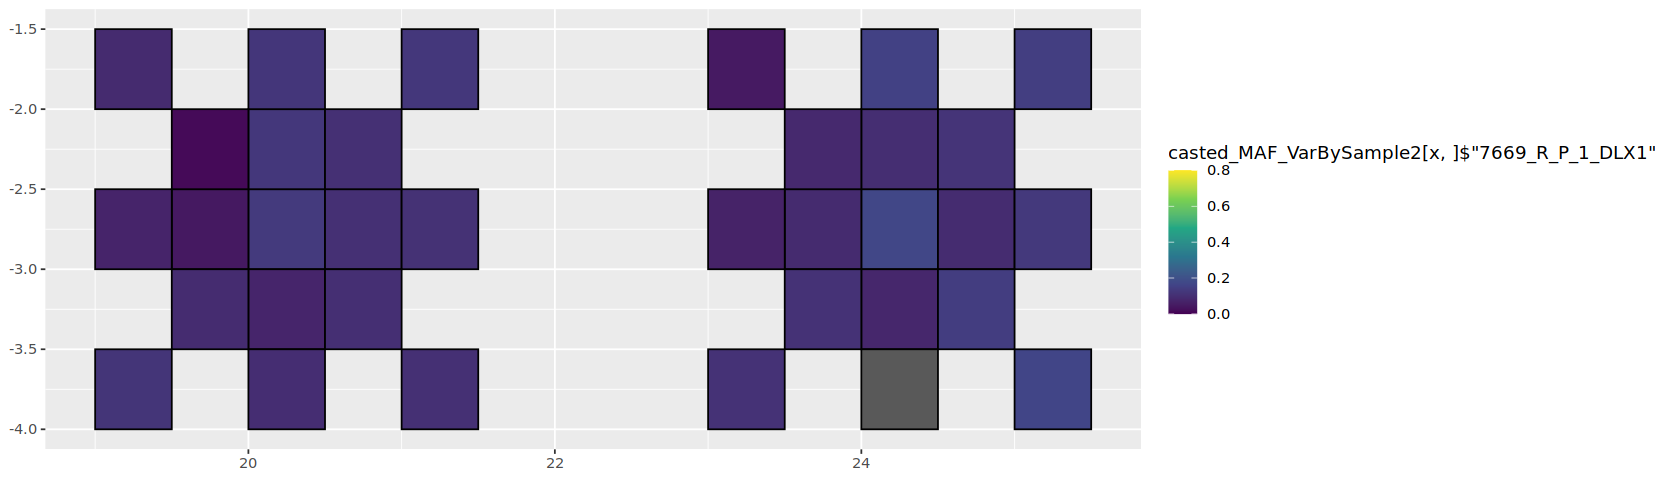

In [35]:
R1 <- 3
R2 <- 5
R3 <- 7
i <- 20
j<- -3
h <- 29
k <- 24
l <- -3
x <- 27
options(repr.plot.width=14, repr.plot.height=4)

ggplot() +  

#DLX1+ nuclei Parietal lobe geoclone
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'),color='black')+
geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_DLX1'),color='black')+
geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_DLX1'),color='black')+

geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_10_DLX1'),color='black')+

geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_DLX1'),color='black')+
geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_DLX1'),color='black')+

geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_DLX1'),color='black')+
geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_DLX1'),color='black')+

#TBR1+ nuclei parietal lobe geoclone
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'),color='black')+
geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_TBR1'),color='black')+
geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_TBR1'),color='black')+

geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_TBR1'),color='black')+
geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_TBR1'),color='black')+

geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_TBR1'),color='black')+
geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_TBR1'),color='black')+

scale_fill_gradient(low = "grey90", high = "red", limits=c(0,0.8))+ scale_fill_viridis_c(limits=c(0,0.8))
#scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 6,name = 'YlOrRd')))

In [34]:
pdf(file="Interneuron_7669_R_P_1to17_geoclone.pdf",width=16,height=6)
for(x in 1:194){
#temp<-final[final$CHROM.POS.REF.ALT==names(table(final$CHROM.POS.REF.ALT))[i],]
plot <- ggplot() + 
#DLX1+ nuclei Parietal lobe geoclone
    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'),color='black')+
    geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_DLX1'),color='black')+
    geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_DLX1'),color='black')+
    geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_DLX1'),color='black')+
    geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_DLX1'),color='black')+

    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_DLX1'),color='black')+
    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_DLX1'),color='black')+
    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_DLX1'),color='black')+
    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_10_DLX'),color='black')+

    geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_DLX1'),color='black')+
    geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_DLX1'),color='black')+
    geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_DLX1'),color='black')+
    geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_DLX1'),color='black')+

    geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_DLX1'),color='black')+
    geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_DLX1'),color='black')+
    geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_DLX1'),color='black')+
    geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_DLX1'),color='black')+

    #TBR1+ nuclei parietal lobe geoclone
    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'),color='black')+
    geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_TBR1'),color='black')+
    geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_TBR1'),color='black')+
    geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_TBR1'),color='black')+
    geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_TBR1'),color='black')+

    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_TBR1'),color='black')+
    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_TBR1'),color='black')+
    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_TBR1'),color='black')+
    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

    geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_TBR1'),color='black')+
    geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_TBR1'),color='black')+
    geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_TBR1'),color='black')+
    geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_TBR1'),color='black')+

    geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_TBR1'),color='black')+
    geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_TBR1'),color='black')+
    geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_TBR1'),color='black')+
    geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_TBR1'),color='black')+
   	labs(title=rownames(casted_MAF_VarBySample2)[x],x="")+
    scale_fill_viridis_c(limits=c(0,0.1))


print(plot)
}
dev.off()

png 
  2

# geoclone for gross brain

In [3]:
melt_mtcars<-mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Hemisphere')]
melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'),]

melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [4]:
casted_MAF_VarBySample <- dcast(melt_mtcars, CHROM.POS.REF.ALT~ID, value.var = "MAF" , na.rm=T)

rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$CHROM.POS.REF.ALT

casted_MAF_VarBySample2 <- casted_MAF_VarBySample[ , !(names(casted_MAF_VarBySample) %in% c("CHROM.POS.REF.ALT"))]


In [5]:
colnames(casted_MAF_VarBySample2)

[1] "7669_L_CC_2_COUPTF2"      "7669_L_CC_2_DLX1"        
  [3] "7669_L_EC_COUPTF2"        "7669_L_EC_DLX1"          
  [5] "7669_L_F_1_COUPTF2"       "7669_L_F_1_DLX1"         
  [7] "7669_L_F_1_TBR1"          "7669_L_I_1_COUPTF2"      
  [9] "7669_L_I_1_DLX1"          "7669_L_I_1_TBR1"         
 [11] "7669_L_mO_COUPTF2"        "7669_L_mO_DLX1"          
 [13] "7669_L_O_1_COUPTF2"       "7669_L_O_1_DLX1"         
 [15] "7669_L_O_1_TBR1"          "7669_L_P_1_COUPTF2"      
 [17] "7669_L_P_1_DLX1"          "7669_L_P_1_TBR1"         
 [19] "7669_L_POA_DLX1"          "7669_L_sec1_Cau_DLX1"    
 [21] "7669_L_sec1_Put_DLX1"     "7669_L_sec2_GP_DLX1"     
 [23] "7669_L_sec2_Thal_COUPTF2" "7669_L_sec2_Thal_DLX1"   
 [25] "7669_L_sec3_Hip_COUPTF2"  "7669_L_sec3_Hip_DLX1"    
 [27] "7669_L_T_1_COUPTF2"       "7669_L_T_1_DLX1"         
 [29] "7669_L_T_1_TBR1"          "7669_R_Ant_Cau_DLX1"     
 [31] "7669_R_Ant_Put_DLX1"      "7669_R_CC_Mid_TBR1"      
 [33] "7669_R_CCMid_COUPTF2"     "7669_R_CCMid_DLX1"       
 [35] "7669_R_EC_COUPTF2"        "7669_R_EC_DLX1"          
 [37] "7669_R_EC_TBR1"           "7669_R_F_1_COUPTF2"      
 [39] "7669_R_F_1_DLX1"          "7669_R_F_1_TBR1"         
 [41] "7669_R_I_1_COUPTF2"       "7669_R_I_1_DLX1"         
 [43] "7669_R_I_1_TBR1"          "7669_R_mO_COUPTF2"       
 [45] "7669_R_mO_DLX1"           "7669_R_mO_TBR1"          
 [47] "7669_R_O_1_COUPTF2"       "7669_R_O_1_DLX1"         
 [49] "7669_R_O_1_TBR1"          "7669_R_O_10_DLX1"        
 [51] "7669_R_O_11_DLX1"         "7669_R_O_2_DLX1"         
 [53] "7669_R_O_3_DLX1"          "7669_R_O_4_DLX1"         
 [55] "7669_R_O_5_DLX1"          "7669_R_O_6_DLX1"         
 [57] "7669_R_O_7_DLX1"          "7669_R_O_8_DLX1"         
 [59] "7669_R_O_9_DLX1"          "7669_R_Olf_DLX1"         
 [61] "7669_R_P_1_COUPTF2"       "7669_R_P_1_DLX1"         
 [63] "7669_R_P_1_TBR1"          "7669_R_P_10_DLX1"        
 [65] "7669_R_P_11_DLX1"         "7669_R_P_11_TBR1"        
 [67] "7669_R_P_12_DLX1"         "7669_R_P_12_TBR1"        
 [69] "7669_R_P_13_DLX1"         "7669_R_P_13_TBR1"        
 [71] "7669_R_P_14_DLX1"         "7669_R_P_14_TBR1"        
 [73] "7669_R_P_15_DLX1"         "7669_R_P_15_TBR1"        
 [75] "7669_R_P_16_DLX1"         "7669_R_P_16_TBR1"        
 [77] "7669_R_P_17_DLX1"         "7669_R_P_17_TBR1"        
 [79] "7669_R_P_2_DLX1"          "7669_R_P_2_TBR1"         
 [81] "7669_R_P_3_DLX1"          "7669_R_P_3_TBR1"         
 [83] "7669_R_P_4_DLX1"          "7669_R_P_4_TBR1"         
 [85] "7669_R_P_5_DLX1"          "7669_R_P_5_TBR1"         
 [87] "7669_R_P_6_DLX1"          "7669_R_P_6_TBR1"         
 [89] "7669_R_P_7_DLX1"          "7669_R_P_7_TBR1"         
 [91] "7669_R_P_8_DLX1"          "7669_R_P_8_TBR1"         
 [93] "7669_R_P_9_DLX"           "7669_R_P_9_DLX1"         
 [95] "7669_R_P_9_TBR1"          "7669_R_POA_DLX1"         
 [97] "7669_R_sec2_GP_DLX1"      "7669_R_sec2_Thal_COUPTF2"
 [99] "7669_R_sec2_Thal_DLX1"    "7669_R_sec3_Cau_DLX1"    
[101] "7669_R_sec3_Hip_COUPTF2"  "7669_R_sec3_Hip_DLX1"    
[103] "7669_R_sec3_Hip_TBR1"     "7669_R_sec3_Put_DLX1"    
[105] "7669_R_T_1_COUPTF2"       "7669_R_T_1_DLX1"         
[107] "7669_R_T_1_TBR1"

In [10]:


R1 <- 3
R2 <- 5
R3 <- 7
i <- 20
j<- -3
h <- 29
k <- 24
v <- 7
x <- 1
options(repr.plot.width=16, repr.plot.height=16)

pdf(file="Interneuron_7669_gross_geoclone.pdf",width=16,height=16)
for(x in 1:194){
#temp<-final[final$CHROM.POS.REF.ALT==names(table(final$CHROM.POS.REF.ALT))[i],]
plot <- ggplot() +  


#--------------------------------------TBR1---------------------------------------------
#Left cortex
geom_rect(aes(xmin = 1, xmax = 3, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_P_1_TBR1'),color='black')+ # Parietal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 3, ymax = 5, fill=casted_MAF_VarBySample2[x,]$'7669_L_F_1_TBR1'),color='black')+ # Frontal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_I_1_TBR1'),color='black')+ # Insular
geom_rect(aes(xmin = 5, xmax = 7, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_T_1_TBR1'),color='black')+ # Temporal
geom_rect(aes(xmin = 3, xmax = 5, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_L_O_1_TBR1'),color='black')+ # Occipital
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # CC
geom_rect(aes(xmin = -3.5, xmax = -1.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # Entorhinal
geom_rect(aes(xmin = 1, xmax = 3, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mOC
#Left Caudate
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1, ymax = 1.67, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # anterior
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 2.34, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left Putamen
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1, ymax = 1.67, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # anterior
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 2.34, ymax = 3,, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left hippocampus
geom_rect(aes(xmin = 8.5, xmax = 10.5, ymin = 0.33, ymax = 1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
# olfactory bulb
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 2.34+0.3, ymax = 3+0.3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left Thal
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1-0.3, ymax = 1.67-0.3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left POA
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 0, ymax = 0.4, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right cortex

geom_rect(aes(xmin = h-3, xmax = h-1, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_P_1_TBR1'),color='black')+ # Parietal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 3, ymax = 5, fill=casted_MAF_VarBySample2[x,]$'7669_L_F_1_TBR1'),color='black')+ # Frontal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_I_1_TBR1'),color='black')+ # Insular
geom_rect(aes(xmin = h-7, xmax = h-5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_T_1_TBR1'),color='black')+ # Temporal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_L_O_1_TBR1'),color='black')+ # Occipital
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # CC
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_EC_TBR1'),color='black')+ # Entorhinal
geom_rect(aes(xmin = 1, xmax = 3, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mOC

geom_rect(aes(xmin = h-3, xmax = h-1, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'),color='black')+ #P
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 3, ymax = 5, fill=casted_MAF_VarBySample2[x,]$'7669_R_F_1_TBR1'),color='black')+ #F
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_I_1_TBR1'),color='black')+ #I
geom_rect(aes(xmin = h-7, xmax = h-5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_O_1_TBR1'),color='black')+ #T
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_R_CC_Mid_TBR1'),color='black')+ #O
geom_rect(aes(xmin = h+1.5, xmax = h-0.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_EC_TBR1'),color='black')+ #CC
geom_rect(aes(xmin = h+3.5, xmax = h+1.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ #Entorhinal
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_R_mO_TBR1'),color='black')+ # mOC
#Right Caudate
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1, ymax = 1.67, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 2.34, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right Putamen
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1, ymax = 1.67, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 2.34, ymax = 3,, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right hippocampus
geom_rect(aes(xmin = h-10.5, xmax = h-8.5, ymin = 0.33, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Hip_TBR1'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 2.34+0.3, ymax = 3+0.3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right Thal
geom_rect(aes(xmin = h-11.5-0.2, xmax = h-13.5-0.2, ymin = 1-0.3, ymax = 1.67-0.3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left POA
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 0, ymax = 0.4, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

#--------------------------------------------------DLX1-------------------------------------

#Left cortex
geom_rect(aes(xmin = 1, xmax = 3, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_P_1_DLX1'),color='black')+ # Parietal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 3-v, ymax = 5-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_F_1_DLX1'),color='black')+ # Frontal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_I_1_DLX1'),color='black')+ # Insular
geom_rect(aes(xmin = 5, xmax = 7, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_T_1_DLX1'),color='black')+ # Temporal
geom_rect(aes(xmin = 3, xmax = 5, ymin = -1-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_O_1_DLX1'),color='black')+ # Occipital
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_CC_2_DLX1'),color='black')+ # CC
geom_rect(aes(xmin = -3.5, xmax = -1.5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_EC_DLX1'),color='black')+ # Entorhinal
geom_rect(aes(xmin = 1, xmax = 3, ymin = -1-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_mO_DLX1'),color='black')+ # mOC
#Left Caudate
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1-v, ymax = 1.67-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec1_Cau_DLX1'),color='black')+ # anterior
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 2.34-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left Putamen
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1-v, ymax = 1.67-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec1_Put_DLX1'),color='black')+ # anterior
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 2.34-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left hippocampus
geom_rect(aes(xmin = 8.5, xmax = 10.5, ymin = 0.33-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec3_Hip_DLX1'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 2.34+0.3-v, ymax = 3+0.3-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#left globus pallidus
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec2_GP_DLX1'),color='black')+
#Left Thal
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1-0.3-v, ymax = 1.67-0.3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec2_Thal_DLX1'),color='black')+
#Left POA
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 0-v, ymax = 0.4-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_POA_DLX1'),color='black')+
#Right cortex
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'),color='black')+ # Parietal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 3-v, ymax = 5-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_F_1_DLX1'),color='black')+ # Frontal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_I_1_DLX1'),color='black')+ # Insular
geom_rect(aes(xmin = h-7, xmax = h-5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_T_1_DLX1'),color='black')+ # Temporal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = -1-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_O_1_DLX1'),color='black')+ # Occipital
geom_rect(aes(xmin = h+1.5, xmax = h-0.5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_CCMid_DLX1'),color='black')+ # CC
geom_rect(aes(xmin = h+1.5, xmax = h+3.5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_EC_DLX1'),color='black')+ # Entorhinal
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = -1-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_mO_DLX1'),color='black')+ # mOC
#Right Caudate
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1-v, ymax = 1.67-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_Ant_Cau_DLX1'),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 2.34-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Cau_DLX1'),color='black')+
#Right Putamen
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1-v, ymax = 1.67-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_Ant_Put_DLX1'),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 2.34-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Put_DLX1'),color='black')+
#Left hippocampus
geom_rect(aes(xmin = h-10.5, xmax = h-8.5, ymin = 0.33-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Hip_DLX1'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 2.34+0.3-v, ymax = 3+0.3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_Olf_DLX1'),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec2_GP_DLX1'),color='black')+
#Right Thal
geom_rect(aes(xmin = h-11.5-0.2, xmax = h-13.5-0.2, ymin = 1-0.3-v, ymax = 1.67-0.3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec2_Thal_DLX1'),color='black')+
#Left POA
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 0-v, ymax = 0.4-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_POA_DLX1'),color='black')+

#--------------------------------------------------COUPTF2-------------------------------------

#Left cortex
geom_rect(aes(xmin = 1, xmax = 3, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_P_1_COUPTF2'),color='black')+ # Parietal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 3+v, ymax = 5+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_F_1_COUPTF2'),color='black')+ # Frontal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_I_1_COUPTF2'),color='black')+ # Insular
geom_rect(aes(xmin = 5, xmax = 7, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_T_1_COUPTF2'),color='black')+ # Temporal
geom_rect(aes(xmin = 3, xmax = 5, ymin = -1+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_O_1_COUPTF2'),color='black')+ # Occipital
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_CC_2_COUPTF2'),color='black')+ # CC
geom_rect(aes(xmin = -3.5, xmax = -1.5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_EC_COUPTF2'),color='black')+ # Entorhinal
geom_rect(aes(xmin = 1, xmax = 3, ymin = -1+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_mO_COUPTF2'),color='black')+ # mOC
#Left Caudate
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1+v, ymax = 1.67+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # anterior
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 2.34+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left Putamen
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1+v, ymax = 1.67+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # anterior
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 2.34+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left hippocampus
geom_rect(aes(xmin = 8.5, xmax = 10.5, ymin = 0.33+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec3_Hip_COUPTF2'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 2.34+0.3+v, ymax = 3+0.3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left Thal
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1-0.3+v, ymax = 1.67-0.3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec2_Thal_COUPTF2'),color='black')+
#Left POA
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 0+v, ymax = 0.4+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right cortex
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_COUPTF2'),color='black')+ # Parietal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 3+v, ymax = 5+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_F_1_COUPTF2'),color='black')+ # Frontal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_I_1_COUPTF2'),color='black')+ # Insular
geom_rect(aes(xmin = h-7, xmax = h-5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_T_1_COUPTF2'),color='black')+ # Temporal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = -1+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_O_1_COUPTF2'),color='black')+ # Occipital
geom_rect(aes(xmin = h+1.5, xmax = h-0.5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_CCMid_COUPTF2'),color='black')+ # CC
geom_rect(aes(xmin = h+1.5, xmax = h+3.5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_EC_COUPTF2'),color='black')+ # Entorhinal
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = -1+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_mO_COUPTF2'),color='black')+ # mOC
#Right Caudate
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1+v, ymax = 1.67+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 2.34+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right Putamen
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1+v, ymax = 1.67+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 2.34+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left hippocampus
geom_rect(aes(xmin = h-10.5, xmax = h-8.5, ymin = 0.33+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Hip_COUPTF2'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 2.34+0.3+v, ymax = 3+0.3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right Thal
geom_rect(aes(xmin = h-11.5-0.2, xmax = h-13.5-0.2, ymin = 1-0.3+v, ymax = 1.67-0.3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec2_Thal_COUPTF2'),color='black')+
#Left POA
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 0+v, ymax = 0.4+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

   	labs(title=rownames(casted_MAF_VarBySample2)[x],x="")
print(plot)
}
dev.off()

png 
  2

In [15]:
# Create example data
x <- 1:10
y <- 1:10
z <- matrix(rnorm(100, 0, 1), nrow = 10, ncol = 10)

# Create a heatmap using ggplot2
heatmap <- ggplot(data = melt(z), aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  scale_fill_continuous_sequential(palette = "Blues")

# Display the plot
heatmap

ERROR: Error in scale_fill_continuous_sequential(palette = "Blues"): could not find function "scale_fill_continuous_sequential"
